In [ ]:
from sklearn.model_selection import train_test_split #1
from sklearn.preprocessing import StandardScaler #2
from sklearn.linear_model import LogisticRegression #3
from sklearn.metrics import accuracy_score #4
import pandas as pd #1
import matplotlib.pyplot as plt #2
import seaborn as sns #3
from google.colab import drive  #4
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#1
kindergarden = pd.read_csv("/content/drive/MyDrive/한국사회보장정보원_전국 시군구별 어린이집 연장보육반 운영 여부_20241130.csv", encoding='cp949')

#2
kindergarden['연장보육반운영여부'] = kindergarden['연장보육반운영여부'].map({'Y': 1, 'N': 0})

#3
kindergarden['어린이집유형'] = kindergarden['어린이집유형'].map({
    '가정': 'Home',
    '국공립': 'Public',
    '민간': 'Private',
    '사회복지법인': 'Social Welfare Corporation',
    '직장': 'In the company',
})

#4
# '시도' 컬럼 값 영어로 변경
kindergarden['시도'] = kindergarden['시도'].map({
    '서울특별시': 'Seoul',
    '부산광역시': 'Busan',
    '대구광역시': 'Daegu',
    '인천광역시': 'Incheon',
    '광주광역시': 'Gwangju',
    '대전광역시': 'Daejeon',
    '울산광역시': 'Ulsan',
    '세종특별자치시': 'Sejong',
    '경기도': 'Gyeonggi',
    '강원특별자치도': 'Gangwon',
    '충청북도': 'Chungbuk',
    '충청남도': 'Chungnam',
    '전북특별자치도': 'Jeonbuk',
    '전라남도': 'Jeonnam',
    '경상북도': 'Gyeongbuk',
    '경상남도': 'Gyeongnam',
    '제주특별자치도': 'Jeju'
})

<ipython-input-45-b46f19a2555c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='어린이집유형', y='연장보육반운영여부', data=type_group, palette='GnBu')


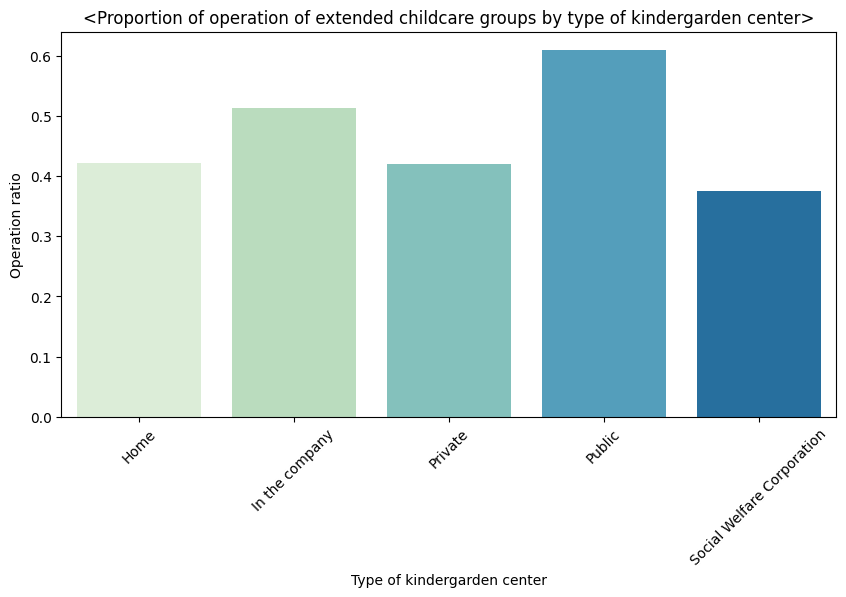

In [ ]:
# 어린이집 유형별 분석
type_group = kindergarden.groupby('어린이집유형').agg({
    '연장보육반운영여부': 'mean'
}).reset_index()

# 시각화: 어린이집 유형별 연장보육반 운영 비율
plt.figure(figsize=(10, 5))
sns.barplot(x='어린이집유형', y='연장보육반운영여부', data=type_group, palette='GnBu')
plt.title('<Proportion of operation of extended childcare groups by type of kindergarden center>')
plt.xlabel('Type of kindergarden center')
plt.ylabel('Operation ratio')
plt.xticks(rotation=45)
plt.show()

<ipython-input-46-95877800cb55>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='연장보육반운영여부', y='시도', data=type_group, palette='viridis')


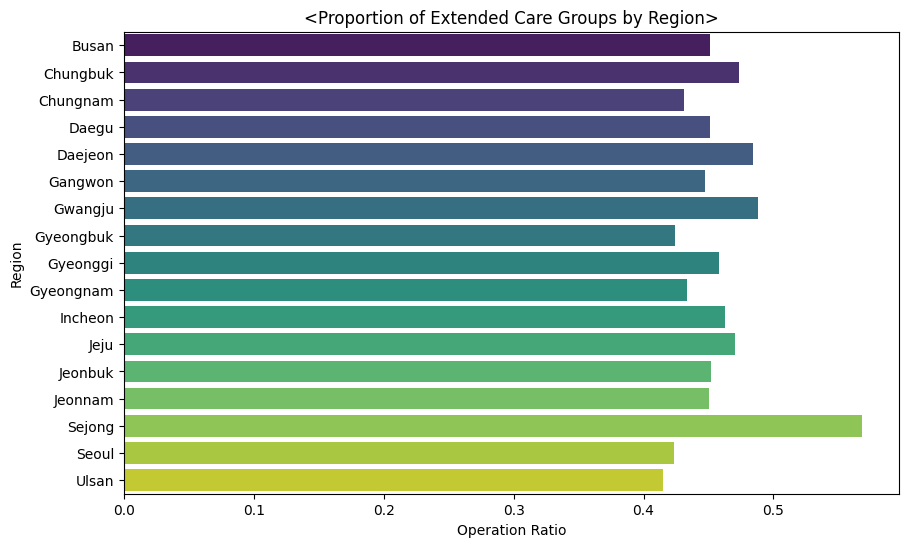

In [ ]:
# 시도별 연장보육반운영여부 비율 계산
type_group = kindergarden.groupby('시도')['연장보육반운영여부'].mean().reset_index()

# 시각화: 시도별 연장보육반운영여부 비율
plt.figure(figsize=(10, 6))
sns.barplot(x='연장보육반운영여부', y='시도', data=type_group, palette='viridis')
plt.title('<Proportion of Extended Care Groups by Region>')
plt.xlabel('Operation Ratio')
plt.ylabel('Region')
plt.show()


<ipython-input-47-42e13f46007f>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='연장보육반운영여부', y='시도', data=type_group_2024, palette='viridis')


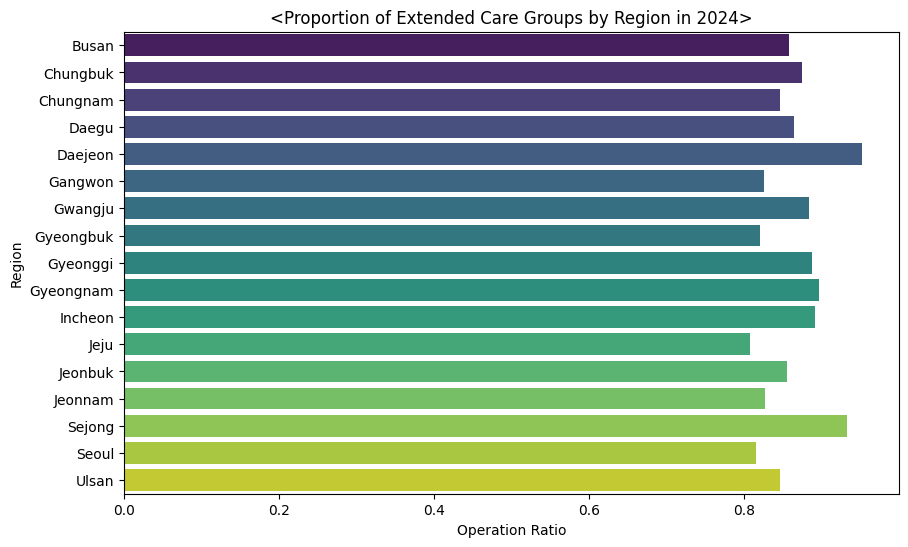

In [ ]:
# 2024년도 데이터 필터링
data_2024 = kindergarden[kindergarden['연도'] == 2024]

# 시도별 연장보육반운영여부 비율 계산
type_group_2024 = data_2024.groupby('시도')['연장보육반운영여부'].mean().reset_index()

# 시각화: 시도별 연장보육반운영여부 비율
plt.figure(figsize=(10, 6))
sns.barplot(x='연장보육반운영여부', y='시도', data=type_group_2024, palette='viridis')
plt.title('<Proportion of Extended Care Groups by Region in 2024>')
plt.xlabel('Operation Ratio')
plt.ylabel('Region')
plt.show()

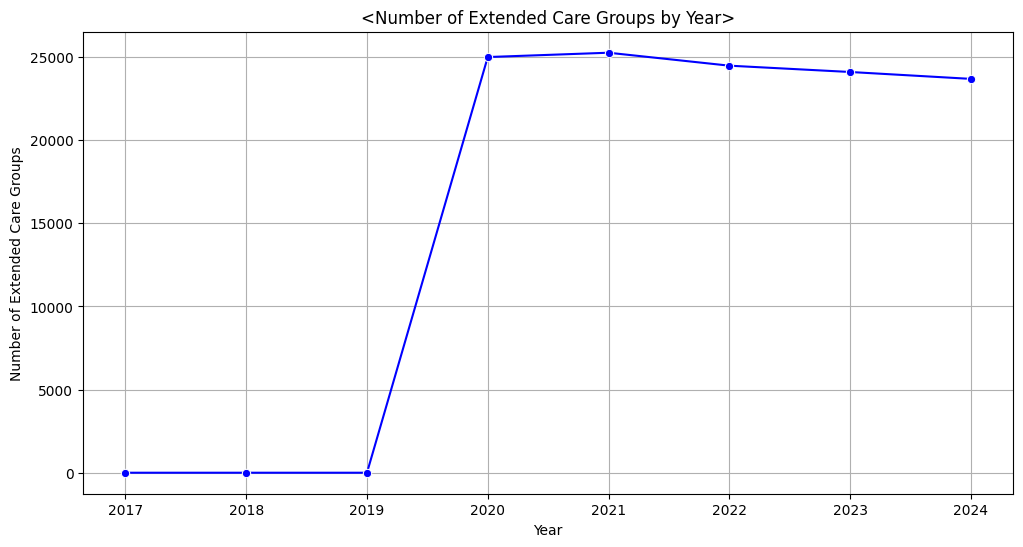

In [ ]:
# 연도별 연장보육반운영여부 개수 계산
yearly_count = kindergarden.groupby('연도')['연장보육반운영여부'].sum().reset_index()

# 시각화: 연도별 연장보육반 운영 개수
plt.figure(figsize=(12, 6))
sns.lineplot(x='연도', y='연장보육반운영여부', data=yearly_count, marker='o', color='blue')
plt.title('<Number of Extended Care Groups by Year>')
plt.xlabel('Year')
plt.ylabel('Number of Extended Care Groups')
plt.grid()
plt.show()

<ipython-input-49-6769986a552f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['연도'] = filtered_data['연도'].astype(int)


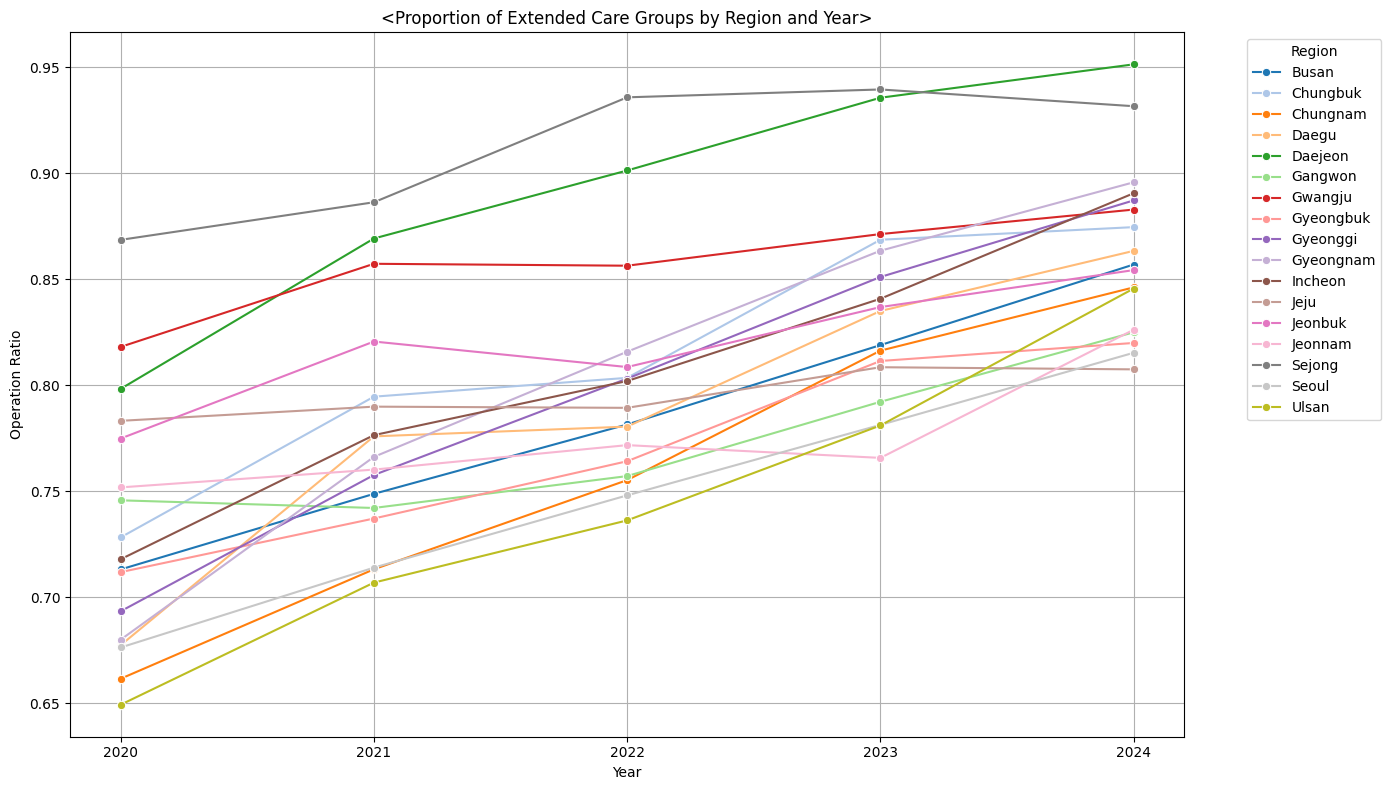

In [ ]:
# 2020년부터의 데이터 필터링
filtered_data = kindergarden[kindergarden['연도'] >= 2020]

# 연도를 정수형으로 변환
filtered_data['연도'] = filtered_data['연도'].astype(int)

# 연도별 각 시도의 연장보육반운영여부 비율 계산
grouped_data = filtered_data.groupby(['연도', '시도'])['연장보육반운영여부'].mean().reset_index()

# 시각화: 연도별 각 시도의 연장보육 운영 비율
plt.figure(figsize=(14, 8))
sns.lineplot(data=grouped_data, x='연도', y='연장보육반운영여부', hue='시도', marker='o', palette='tab20')

# x축 눈금 명시적으로 설정
plt.xticks(grouped_data['연도'].unique())

plt.title('<Proportion of Extended Care Groups by Region and Year>')
plt.xlabel('Year')
plt.ylabel('Operation Ratio')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
kindergarden = pd.get_dummies(kindergarden, columns=['시도', '어린이집유형'], drop_first=True)

# 특성 변수와 타겟 변수 분리
X = kindergarden[['연도', '정원', '현원'] + [col for col in kindergarden.columns if col.startswith('시도_') or col.startswith('어린이집유형_')]]
y = kindergarden['연장보육반운영여부']

# 전체 데이터의 60%를 training data로, 20%를 validation data, 20%를 test data로 설정
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# 표준화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 모델 훈련 - 로지스틱 회귀
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 성능 평가
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.83
